# CheXpert Data Analysis Notebook

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


plt.style.use('ggplot')
%matplotlib inline

dataset_path = "/vol/aimspace/projects/practical_WS2425/vision_language/data/CheXpert-v1.0-small"
train_csv_path = os.path.join(dataset_path, 'train.csv')
val_csv_path = os.path.join(dataset_path, 'valid.csv')


train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)

In [14]:
# Calculate image sizes and mean pixel intensities
def calculate_image_stats(df, num_samples=100):
    heights, widths, means = [], [], []
    for _, row in df.sample(num_samples).iterrows():
        img_path = os.path.join(dataset_path, row['Path'].replace("CheXpert-v1.0-small/", ""))
        img = Image.open(img_path).convert("L")
        heights.append(img.height)
        widths.append(img.width)
        means.append(np.mean(img))

    return heights, widths, means

# Function to display images with labels
def display_sample_images(df, labels, title, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 10))
    fig.suptitle(title + " Sample Images", fontsize=16)  # Set the title for the entire figure
    plt.subplots_adjust(top=1.3)  # Adjust this value to control spacing below the title
    for i, ax in enumerate(axes):
        sample = df.sample(1).iloc[0]
        img_path = os.path.join(dataset_path, sample['Path'].replace("CheXpert-v1.0-small/", ""))
        img = Image.open(img_path).convert("L")  # Convert to grayscale
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        title = ', '.join([col for col in labels if sample[col] == 1])
        ax.set_title(title if title else "No Findings", fontsize=8)
    plt.show()

### Display Dataframe Statistics

In [15]:
print(f"Train: Number of samples: {len(train_df)}")
display(train_df.head())

# Replace -1 with NaN (or use 0 if preferred)
train_df = train_df.replace(-1, np.nan)

# Check for missing values
print("Train: Missing values per column:")
print(train_df.isnull().sum())


print(f"Val: Number of samples: {len(val_df)}")
display(val_df.head())

# Replace -1 with NaN (or use 0 if preferred)
val_df = val_df.replace(-1, np.nan)

# Check for missing values
print("Val: Missing values per column:")
print(val_df.isnull().sum())

Train: Number of samples: 223414


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Train: Missing values per column:
Path                               0
Sex                                0
Age                                0
Frontal/Lateral                    0
AP/PA                          32387
No Finding                    201033
Enlarged Cardiomediastinum    190978
Cardiomegaly                  185298
Lung Opacity                  111234
Lung Lesion                   212958
Edema                         150442
Consolidation                 180534
Pneumonia                     214576
Atelectasis                   188710
Pneumothorax                  147625
Pleural Effusion              101831
Pleural Other                 219575
Fracture                      211862
Support Devices               101276
dtype: int64
Val: Number of samples: 234


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Val: Missing values per column:
Path                           0
Sex                            0
Age                            0
Frontal/Lateral                0
AP/PA                         32
No Finding                     0
Enlarged Cardiomediastinum     0
Cardiomegaly                   0
Lung Opacity                   0
Lung Lesion                    0
Edema                          0
Consolidation                  0
Pneumonia                      0
Atelectasis                    0
Pneumothorax                   0
Pleural Effusion               0
Pleural Other                  0
Fracture                       0
Support Devices                0
dtype: int64


### Plot Label Distribution

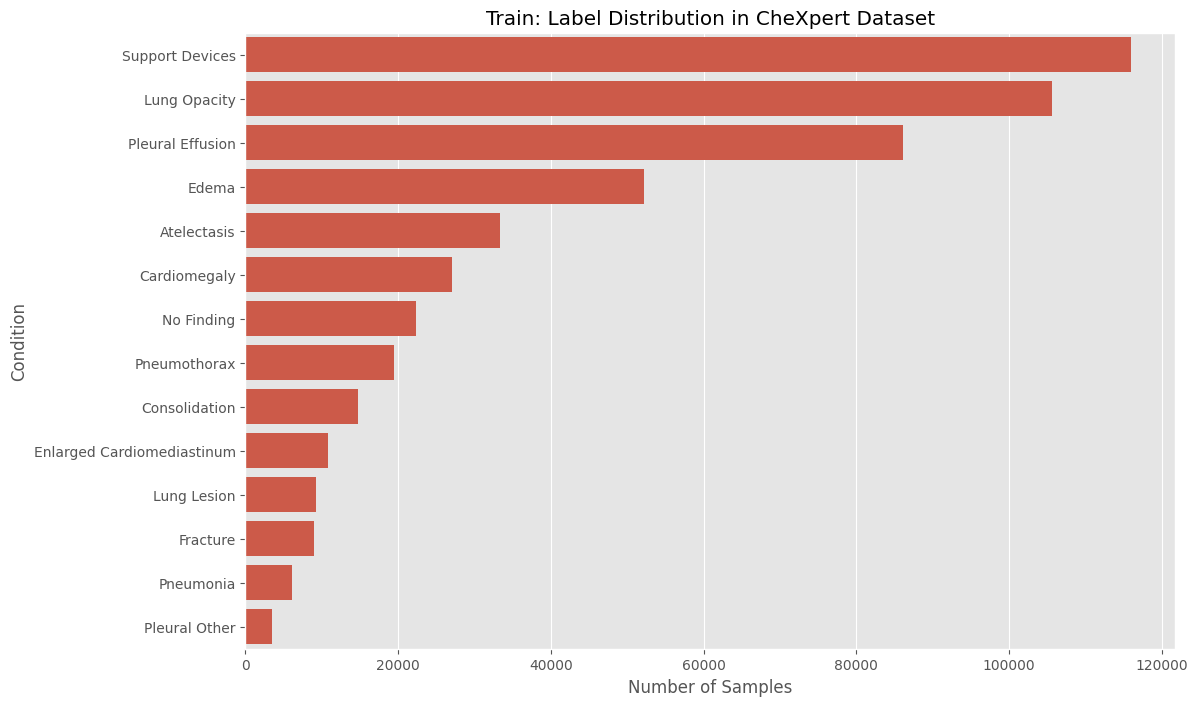

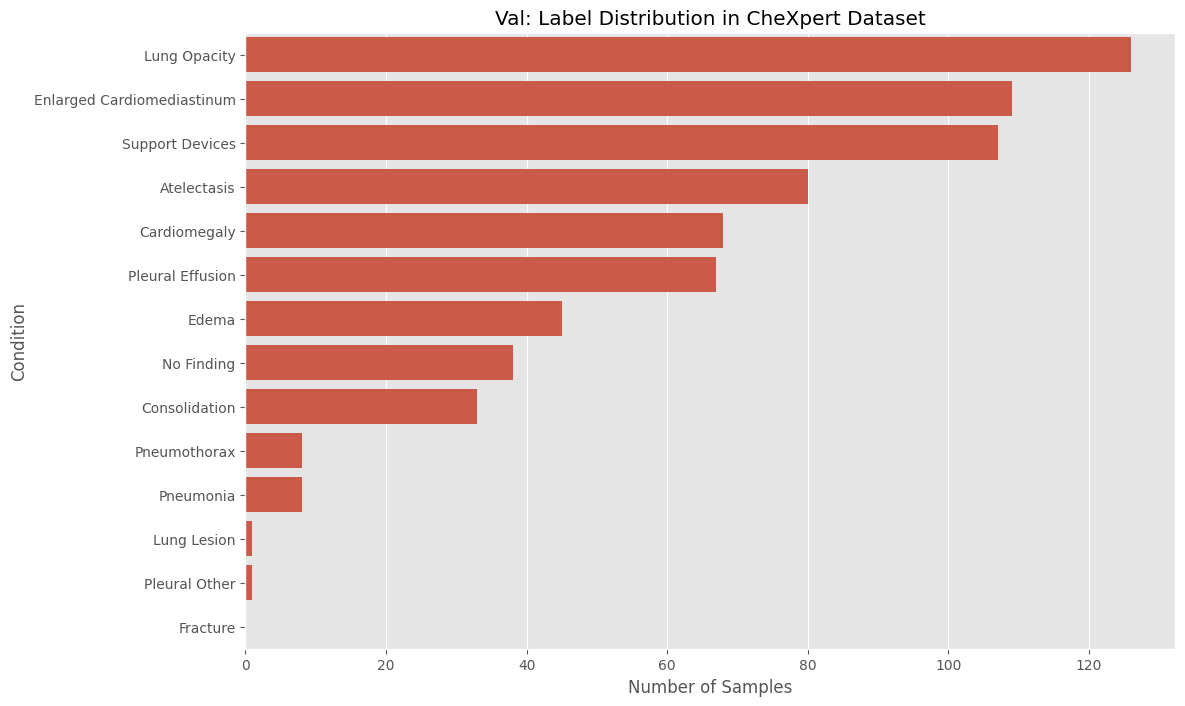

In [16]:
# Count distribution for each label
train_labels = train_df.columns[5:]  # Disease labels start from column index 5
train_label_counts = train_df[train_labels].sum().sort_values(ascending=False)

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=train_label_counts.values, y=train_label_counts.index)
plt.title("Train: Label Distribution in CheXpert Dataset")
plt.xlabel("Number of Samples")
plt.ylabel("Condition")
plt.show()


# Count distribution for each label
val_labels = val_df.columns[5:]  # Disease labels start from column index 5
val_label_counts = val_df[val_labels].sum().sort_values(ascending=False)

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=val_label_counts.values, y=val_label_counts.index)
plt.title("Val: Label Distribution in CheXpert Dataset")
plt.xlabel("Number of Samples")
plt.ylabel("Condition")
plt.show()

### Display feature distributions

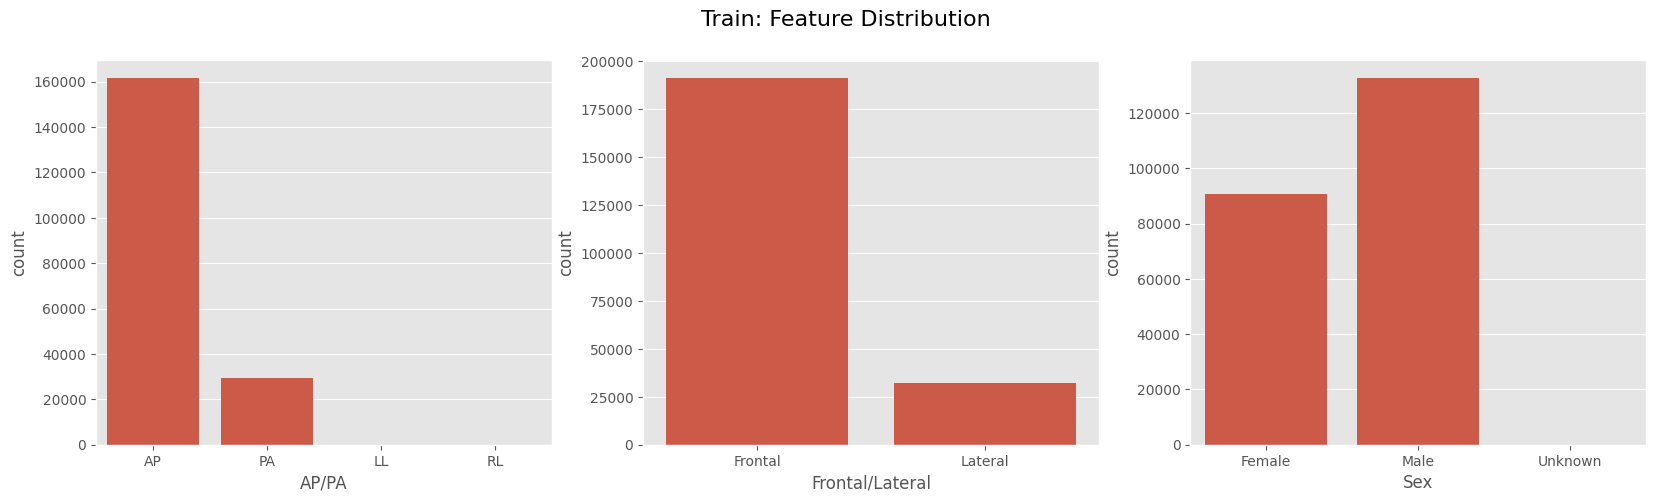

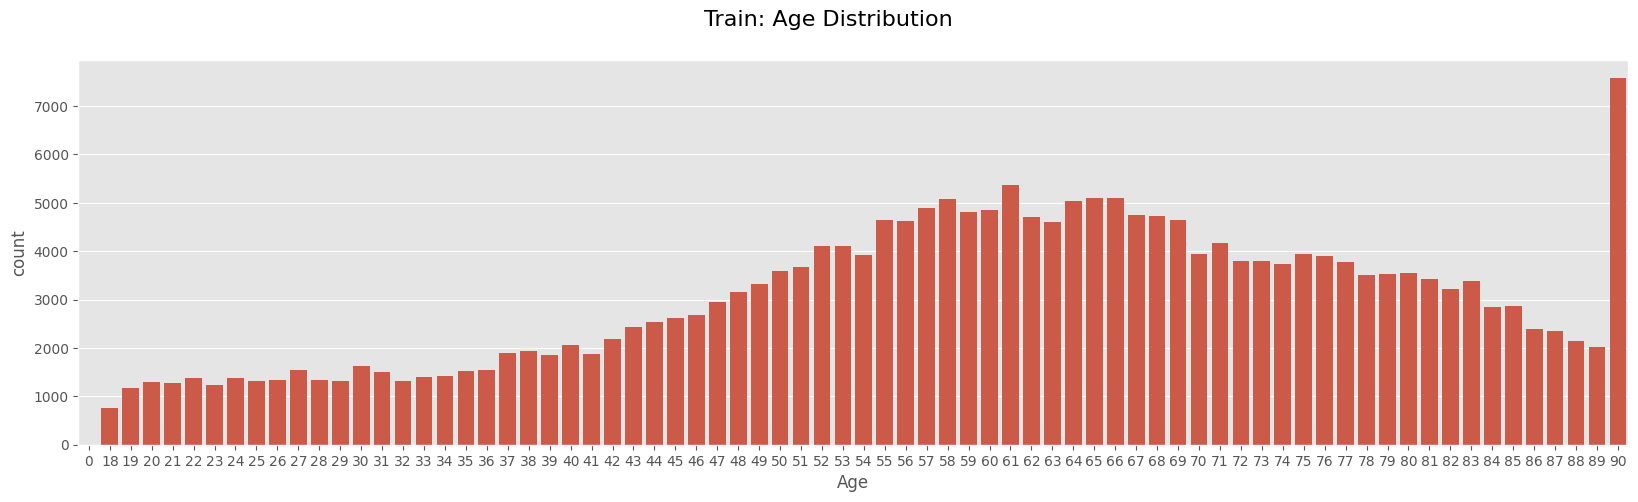

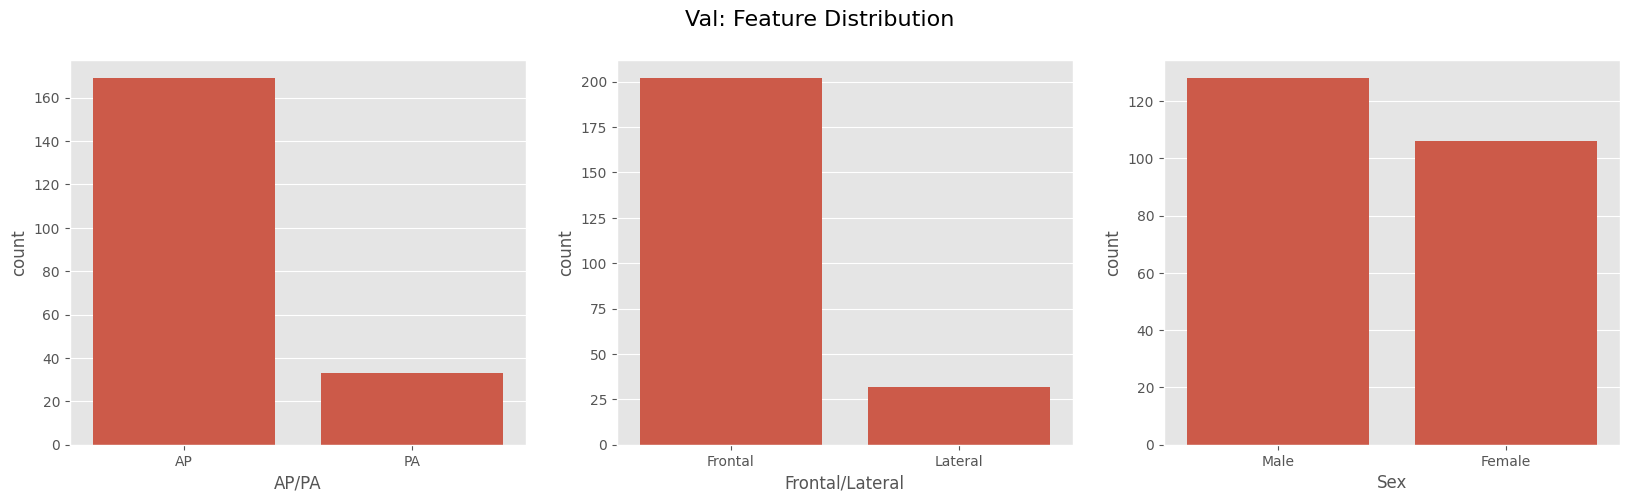

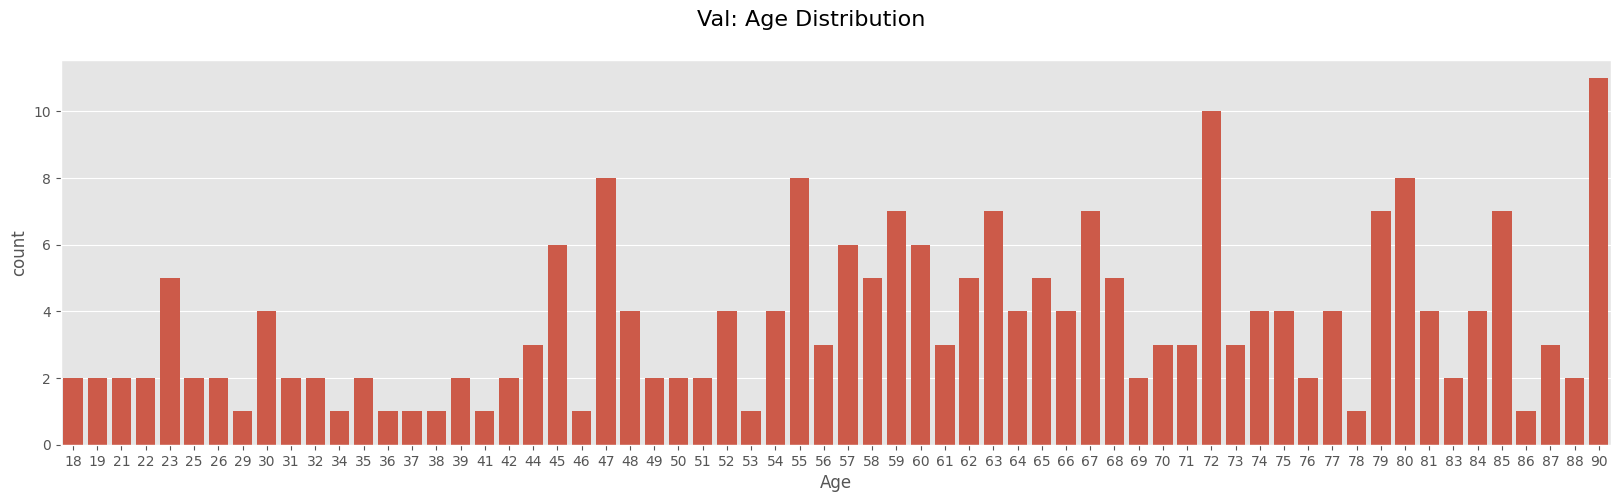

In [17]:
# Display label distributions for feature columns
features = ['AP/PA', 'Frontal/Lateral', 'Sex']
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle("Train: Feature Distribution", fontsize=16)
for i, feature in enumerate(features):
    sns.countplot(x=feature, data=train_df, ax=ax[i])

plt.show()

# Display age distribution
plt.figure(figsize=(20, 5))
plt.suptitle("Train: Age Distribution", fontsize=16)
sns.countplot(x='Age', data=train_df)
plt.show()


# Display label distributions for feature columns
features = ['AP/PA', 'Frontal/Lateral', 'Sex']
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle("Val: Feature Distribution", fontsize=16)
for i, feature in enumerate(features):
    sns.countplot(x=feature, data=val_df, ax=ax[i])

plt.show()
# Display age distribution
plt.figure(figsize=(20, 5))
plt.suptitle("Val: Age Distribution", fontsize=16)
sns.countplot(x='Age', data=val_df)
plt.show()

### Display Sample Images

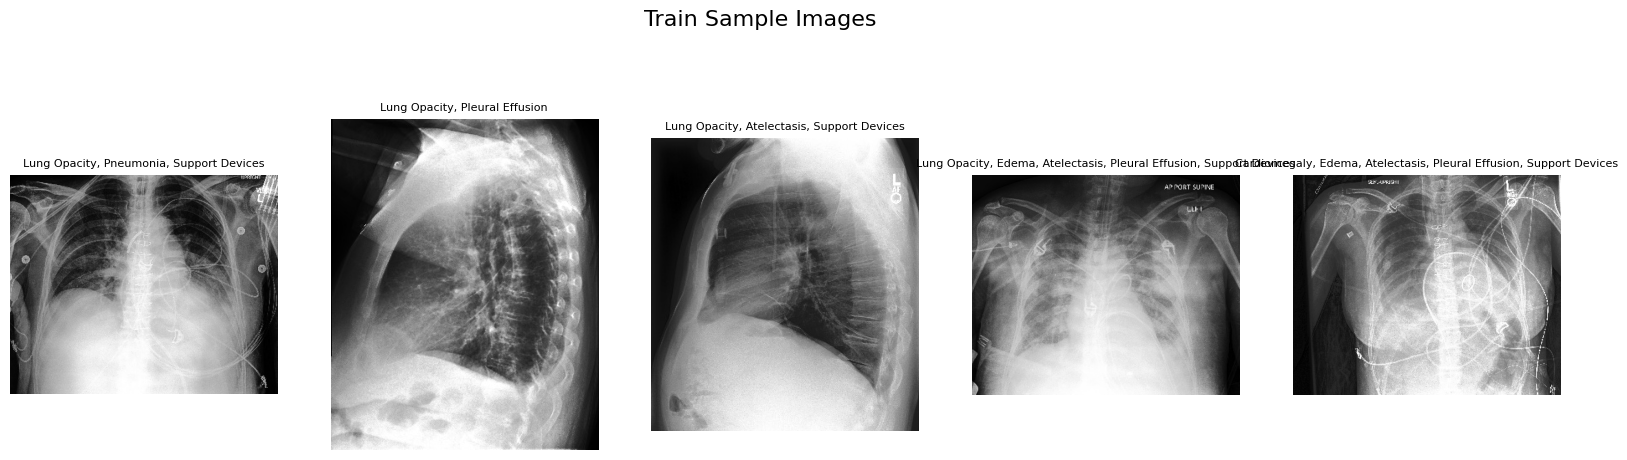

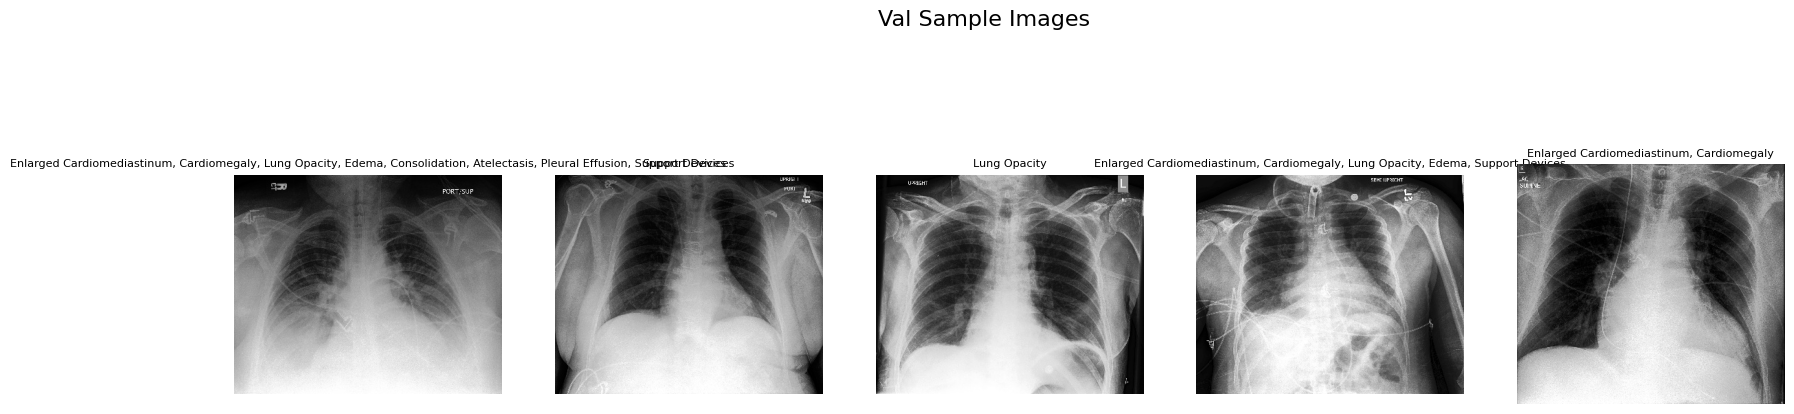

In [18]:
# Display sample images
display_sample_images(train_df, train_labels, "Train")
display_sample_images(val_df, val_labels, "Val")

### Plot Image Statistics

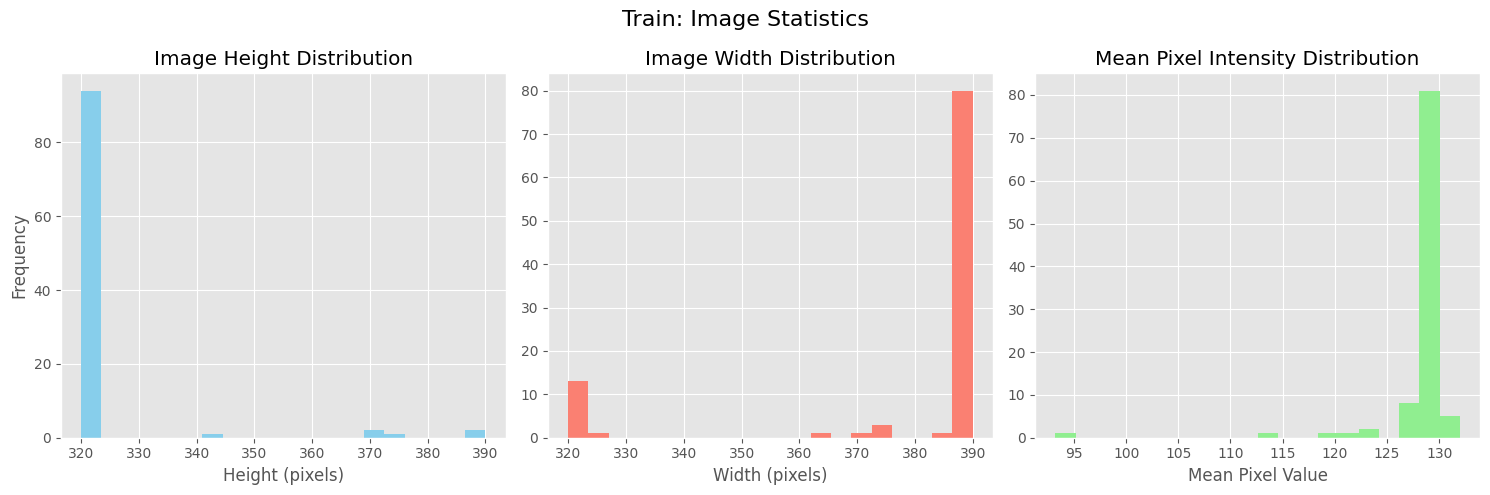

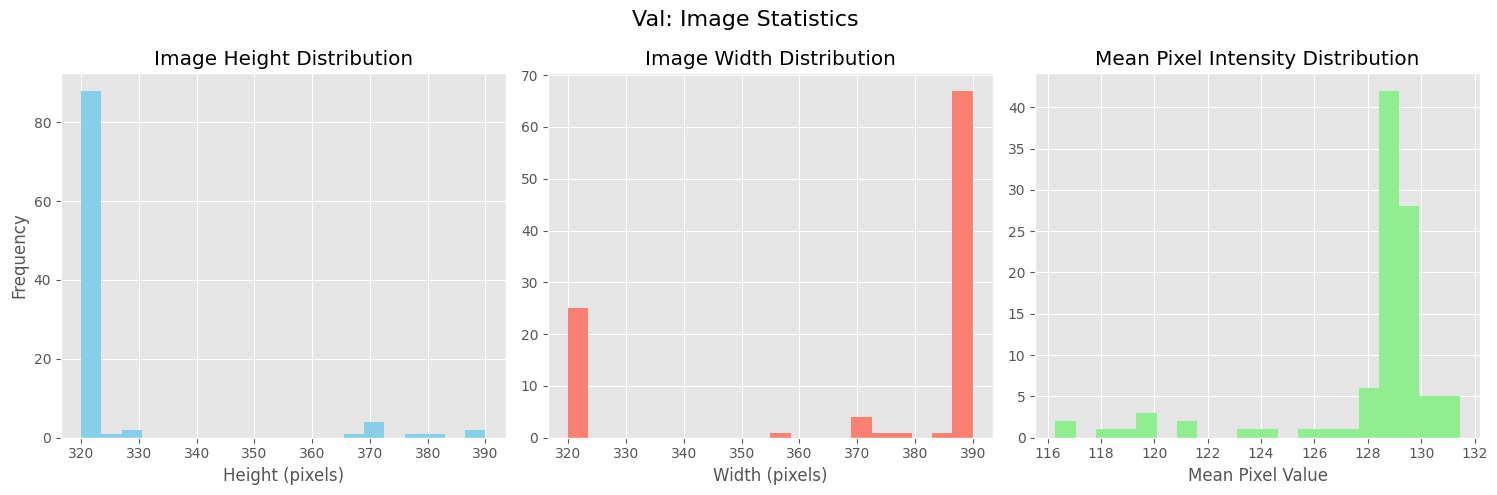

In [19]:
train_heights, train_widths, train_means = calculate_image_stats(train_df)

# Plot image statistics
plt.figure(figsize=(15, 5))
plt.suptitle("Train: Image Statistics", fontsize=16)

# Height Distribution
plt.subplot(1, 3, 1)
plt.hist(train_heights, bins=20, color='skyblue')
plt.title("Image Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")

# Width Distribution
plt.subplot(1, 3, 2)
plt.hist(train_widths, bins=20, color='salmon')
plt.title("Image Width Distribution")
plt.xlabel("Width (pixels)")

# Mean Pixel Intensity Distribution
plt.subplot(1, 3, 3)
plt.hist(train_means, bins=20, color='lightgreen')
plt.title("Mean Pixel Intensity Distribution")
plt.xlabel("Mean Pixel Value")

plt.tight_layout()
plt.show()


val_heights, val_widths, val_means = calculate_image_stats(val_df)

# Plot image statistics
plt.figure(figsize=(15, 5))
plt.suptitle("Val: Image Statistics", fontsize=16)


# Height Distribution
plt.subplot(1, 3, 1)
plt.hist(val_heights, bins=20, color='skyblue')
plt.title("Image Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")

# Width Distribution
plt.subplot(1, 3, 2)
plt.hist(val_widths, bins=20, color='salmon')
plt.title("Image Width Distribution")
plt.xlabel("Width (pixels)")

# Mean Pixel Intensity Distribution
plt.subplot(1, 3, 3)
plt.hist(val_means, bins=20, color='lightgreen')
plt.title("Mean Pixel Intensity Distribution")
plt.xlabel("Mean Pixel Value")

plt.tight_layout()
plt.show()